In [2]:
import os
import time
import polars as pl
import numpy as np
import matplotlib.pyplot as plt

In [3]:
DATA_DIR = "Data"
TRAIN_PATH = os.path.join(DATA_DIR, "train-dset.parquet")
TEST_PATH = os.path.join(DATA_DIR, "test-dset-small.parquet")

# 1. –†–∞–∑–º–µ—Ä—ã

In [4]:
t0 = time.time()

train_lf = pl.scan_parquet(TRAIN_PATH)
test_lf = pl.scan_parquet(TEST_PATH)


train = train_lf.collect(streaming=True)
test = test_lf.collect(streaming=True)

print(f"[load] train: {train.shape}, test: {test.shape}, time: {time.time()-t0:.2f}s\n")

C:\Users\idine\AppData\Local\Temp\ipykernel_52048\19000350.py:7: DeprecationWarning: the `streaming` parameter was deprecated in 1.25.0; use `engine` instead.
  train = train_lf.collect(streaming=True)
C:\Users\idine\AppData\Local\Temp\ipykernel_52048\19000350.py:8: DeprecationWarning: the `streaming` parameter was deprecated in 1.25.0; use `engine` instead.
  test = test_lf.collect(streaming=True)


[load] train: (7781790, 14), test: (335348, 13), time: 4.27s



# 2. C—Ö–µ–º–∞

In [5]:
print("[schema] dtypes (train):")
for k, v in train.schema.items():
    print(f"  {k}: {v}")
print()

[schema] dtypes (train):
  query_id: Int64
  item_id: Int64
  query_text: String
  item_title: String
  item_description: String
  query_cat: Float32
  query_mcat: Float64
  query_loc: Float32
  item_cat_id: Int32
  item_mcat_id: Int32
  item_loc: Int32
  price: Float32
  item_query_click_conv: Float32
  item_contact: Float32



In [7]:
train.head(5)

shape: (5, 14)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ query_id ‚îÜ item_id    ‚îÜ query_text ‚îÜ item_title ‚îÜ ‚Ä¶ ‚îÜ item_loc ‚îÜ price  ‚îÜ item_query ‚îÜ item_cont ‚îÇ
‚îÇ ---      ‚îÜ ---        ‚îÜ ---        ‚îÜ ---        ‚îÜ   ‚îÜ ---      ‚îÜ ---    ‚îÜ _click_con ‚îÜ act       ‚îÇ
‚îÇ i64      ‚îÜ i64        ‚îÜ str        ‚îÜ str        ‚îÜ   ‚îÜ i32      ‚îÜ f32    ‚îÜ v          ‚îÜ ---       ‚îÇ
‚îÇ          ‚îÜ            ‚îÜ            ‚îÜ            ‚îÜ   ‚îÜ          ‚îÜ        ‚îÜ ---        ‚îÜ f32       ‚îÇ
‚îÇ          ‚îÜ            ‚îÜ            ‚îÜ            ‚îÜ   ‚îÜ          ‚îÜ        ‚îÜ f32        ‚îÜ           ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 4        ‚îÜ 7349717282 ‚îÜ –±–æ—Ç–∏–Ω–∫–∏    ‚îÜ –ë–æ—Ç–∏–Ω–∫–∏    ‚îÜ ‚Ä¶ ‚îÜ 638660   ‚îÜ 500.0  ‚îÜ -1.0       ‚îÜ 0.0       ‚îÇ
‚îÇ          ‚îÜ            ‚îÜ –¥–µ—Ç—Å–∫–∏–µ    ‚îÜ –¥–µ—Ç—Å–∫–∏–µ    ‚îÜ   ‚îÜ          ‚îÜ        ‚îÜ            ‚îÜ           ‚îÇ
‚îÇ          ‚îÜ            ‚îÜ zara 21    ‚îÜ Zara       ‚îÜ   ‚îÜ          ‚îÜ        ‚îÜ            ‚îÜ           ‚îÇ
‚îÇ 4        ‚îÜ 7519735286 ‚îÜ –±–æ—Ç–∏–Ω–∫–∏    ‚îÜ –î–µ—Ç—Å–∫–∏–µ    ‚îÜ ‚Ä¶ ‚îÜ 637640   ‚îÜ 250.0  ‚îÜ -1.0       ‚îÜ 0.0       ‚îÇ
‚îÇ          ‚îÜ            ‚îÜ –¥–µ—Ç—Å–∫–∏–µ    ‚îÜ –±–æ—Ç–∏–Ω–∫–∏    ‚îÜ   ‚îÜ          ‚îÜ        ‚îÜ            ‚îÜ           ‚îÇ
‚îÇ          ‚îÜ            ‚îÜ zara 21    ‚îÜ Zara       ‚îÜ   ‚îÜ          ‚îÜ        ‚îÜ            ‚îÜ           ‚îÇ
‚îÇ          ‚îÜ            ‚îÜ            ‚îÜ —É–Ω–∏—Å–µ–∫—Å    ‚îÜ   ‚îÜ          ‚îÜ        ‚îÜ            ‚îÜ           ‚îÇ
‚îÇ 4        ‚îÜ 4384449104 ‚îÜ –±–æ—Ç–∏–Ω–∫–∏    ‚îÜ –ë–æ—Ç–∏–Ω–∫–∏    ‚îÜ ‚Ä¶ ‚îÜ 623880   ‚îÜ 1500.0 ‚îÜ -1.0       ‚îÜ 0.0       ‚îÇ
‚îÇ          ‚îÜ            ‚îÜ –¥–µ—Ç—Å–∫–∏–µ    ‚îÜ –¥–µ—Ç—Å–∫–∏–µ    ‚îÜ   ‚îÜ          ‚îÜ        ‚îÜ            ‚îÜ           ‚îÇ
‚îÇ          ‚îÜ            ‚îÜ zara 21    ‚îÜ zara       ‚îÜ   ‚îÜ          ‚îÜ        ‚îÜ            ‚îÜ           ‚îÇ
‚îÇ 4        ‚îÜ 7283365509 ‚îÜ –±–æ—Ç–∏–Ω–∫–∏    ‚îÜ –î–µ—Ç—Å–∫–∏–µ    ‚îÜ ‚Ä¶ ‚îÜ 628530   ‚îÜ 220.0  ‚îÜ -1.0       ‚îÜ 0.0       ‚îÇ
‚îÇ          ‚îÜ            ‚îÜ –¥–µ—Ç—Å–∫–∏–µ    ‚îÜ –±–æ—Ç–∏–Ω–æ—á–∫–∏  ‚îÜ   ‚îÜ          ‚îÜ        ‚îÜ            ‚îÜ           ‚îÇ
‚îÇ          ‚îÜ            ‚îÜ zara 21    ‚îÜ Zara 21    ‚îÜ   ‚îÜ          ‚îÜ        ‚îÜ            ‚îÜ           ‚îÇ
‚îÇ          ‚îÜ            ‚îÜ            ‚îÜ —Ä–∞–∑–º‚Ä¶      ‚îÜ   ‚îÜ          ‚îÜ        ‚îÜ            ‚îÜ           ‚îÇ
‚îÇ 4        ‚îÜ 4452768560 ‚îÜ –±–æ—Ç–∏–Ω–∫–∏    ‚îÜ –î–µ—Ç—Å–∫–∏–µ    ‚îÜ ‚Ä¶ ‚îÜ 637640   ‚îÜ 1648.0 ‚îÜ -1.0       ‚îÜ 1.0       ‚îÇ
‚îÇ          ‚îÜ            ‚îÜ –¥–µ—Ç—Å–∫–∏–µ    ‚îÜ –±–æ—Ç–∏–Ω–æ—á–∫–∏  ‚îÜ   ‚îÜ          ‚îÜ        ‚îÜ            ‚îÜ           ‚îÇ
‚îÇ          ‚îÜ            ‚îÜ zara 21    ‚îÜ zara       ‚îÜ   ‚îÜ          ‚îÜ        ‚îÜ            ‚îÜ           ‚îÇ
‚îÇ          ‚îÜ            ‚îÜ            ‚îÜ —Ä–∞–∑–º–µ—Ä ‚Ä¶   ‚îÜ   ‚îÜ          ‚îÜ        ‚îÜ            ‚îÜ           ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

# 3. –ü—Ä–æ–ø—É—Å–∫–∏

In [8]:
missing = (
    train
    .select([pl.col(c).is_null().sum().alias(c) for c in train.columns])
    .transpose(include_header=True, header_name="column", column_names=["nulls"])
    .with_columns([
        (pl.col("nulls") / train.height).alias("null_frac")
    ])
    .sort("nulls", descending=True)
)
print("[missing] –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏ –¥–æ–ª—è –ø—Ä–æ–ø—É—Å–∫–æ–≤ –ø–æ –∫–æ–ª–æ–Ω–∫–∞–º:")
missing


[missing] –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏ –¥–æ–ª—è –ø—Ä–æ–ø—É—Å–∫–æ–≤ –ø–æ –∫–æ–ª–æ–Ω–∫–∞–º:


shape: (14, 3)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ column                ‚îÜ nulls   ‚îÜ null_frac ‚îÇ
‚îÇ ---                   ‚îÜ ---     ‚îÜ ---       ‚îÇ
‚îÇ str                   ‚îÜ u32     ‚îÜ f64       ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ query_mcat            ‚îÜ 1761233 ‚îÜ 0.226327  ‚îÇ
‚îÇ item_title            ‚îÜ 107     ‚îÜ 0.000014  ‚îÇ
‚îÇ item_description      ‚îÜ 107     ‚îÜ 0.000014  ‚îÇ
‚îÇ query_id              ‚îÜ 0       ‚îÜ 0.0       ‚îÇ
‚îÇ item_id               ‚îÜ 0       ‚îÜ 0.0       ‚îÇ
‚îÇ ‚Ä¶                     ‚îÜ ‚Ä¶       ‚îÜ ‚Ä¶         ‚îÇ
‚îÇ item_mcat_id          ‚îÜ 0       ‚îÜ 0.0       ‚îÇ
‚îÇ item_loc              ‚îÜ 0       ‚îÜ 0.0       ‚îÇ
‚îÇ price                 ‚îÜ 0       ‚îÜ 0.0       ‚îÇ
‚îÇ item_query_click_conv ‚îÜ 0       ‚îÜ 0.0       ‚îÇ
‚îÇ item_contact          ‚îÜ 0       ‚îÜ 0.0       ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [9]:
print(missing)

shape: (14, 3)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ column                ‚îÜ nulls   ‚îÜ null_frac ‚îÇ
‚îÇ ---                   ‚îÜ ---     ‚îÜ ---       ‚îÇ
‚îÇ str                   ‚îÜ u32     ‚îÜ f64       ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ query_mcat            ‚îÜ 1761233 ‚îÜ 0.226327  ‚îÇ
‚îÇ item_title            ‚îÜ 107     ‚îÜ 0.000014  ‚îÇ
‚îÇ item_description      ‚îÜ 107     ‚îÜ 0.000014  ‚îÇ
‚îÇ query_id              ‚îÜ 0       ‚îÜ 0.0       ‚îÇ
‚îÇ item_id               ‚îÜ 0       ‚îÜ 0.0       ‚îÇ
‚îÇ ‚Ä¶                     ‚îÜ ‚Ä¶       ‚îÜ ‚Ä¶         ‚îÇ
‚îÇ item_mcat_id          ‚îÜ 0       ‚îÜ 0.0       ‚îÇ
‚îÇ item_loc              ‚îÜ 0       ‚îÜ 0.0       ‚îÇ
‚îÇ price                 ‚îÜ 0       ‚îÜ 0.0       ‚îÇ
‚îÇ item_query_click_co

# 4. –£–Ω–∏–∫–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è

In [10]:
def nunique(df: pl.DataFrame, col: str) -> int:
    return df.select(pl.col(col).n_unique()).item()

print("[unique] —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö query_id (train/test):", nunique(train, "query_id"), nunique(test, "query_id"))
print("[unique] —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö item_id   (train/test):", nunique(train, "item_id"), nunique(test, "item_id"))
print()

[unique] —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö query_id (train/test): 678190 12505
[unique] —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö item_id   (train/test): 5773058 321625



# –ß–∏—Å–ª–æ–≤—ã–µ –¥–∞–Ω–Ω—ã–µ

In [20]:
num_cols = [c for c, t in train.schema.items() if t in pl.NUMERIC_DTYPES]
if num_cols:
    # –î–ª—è –∫–æ–º–ø–∞–∫—Ç–Ω–æ—Å—Ç–∏ —Å—á–∏—Ç–∞–µ–º –Ω–∞–±–æ—Ä —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫ –ø–æ –∫–∞–∂–¥–æ–π —á–∏—Å–ª–æ–≤–æ–π –∫–æ–ª–æ–Ω–∫–µ
    stats_rows = []
    for c in num_cols:
        s = (
            train
            .select(
                pl.col(c).cast(pl.Float64),
                pl.len().alias("__n")
            )
            .select([
                pl.lit(c).alias("column"),
                pl.col(c).mean().alias("mean"),
                pl.col(c).std().alias("std"),
                pl.col(c).min().alias("min"),
                pl.col(c).quantile(0.25).alias("p25"),
                pl.col(c).median().alias("p50"),
                pl.col(c).quantile(0.75).alias("p75"),
                pl.col(c).quantile(0.95).alias("p95"),
                pl.col(c).quantile(0.99).alias("p99"),
                pl.col(c).max().alias("max"),
            ])
        )
        stats_rows.append(s)
    num_stats = pl.concat(stats_rows)
    print("[numeric] –±–∞–∑–æ–≤—ã–µ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏:")
    res = num_stats.sort("column")

C:\Users\idine\AppData\Local\Temp\ipykernel_52048\1822074572.py:1: DeprecationWarning: `NUMERIC_DTYPES` was deprecated in version 1.0.0. Define your own data type groups or use the `polars.selectors` module for selecting columns of a certain data type.
  num_cols = [c for c, t in train.schema.items() if t in pl.NUMERIC_DTYPES]


[numeric] –±–∞–∑–æ–≤—ã–µ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏:


In [21]:
res

shape: (11, 10)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ column    ‚îÜ mean      ‚îÜ std       ‚îÜ min      ‚îÜ ‚Ä¶ ‚îÜ p75       ‚îÜ p95       ‚îÜ p99       ‚îÜ max       ‚îÇ
‚îÇ ---       ‚îÜ ---       ‚îÜ ---       ‚îÜ ---      ‚îÜ   ‚îÜ ---       ‚îÜ ---       ‚îÜ ---       ‚îÜ ---       ‚îÇ
‚îÇ str       ‚îÜ f64       ‚îÜ f64       ‚îÜ f64      ‚îÜ   ‚îÜ f64       ‚îÜ f64       ‚îÜ f64       ‚îÜ f64       ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ item_cat_ ‚îÜ 58.124696 ‚îÜ 42.391457 ‚îÜ 0.0      ‚îÜ ‚Ä¶ ‚îÜ 111.0     ‚îÜ 114.0     ‚îÜ 114.0     ‚îÜ 426.0     ‚îÇ
‚îÇ id        ‚îÜ           ‚îÜ           ‚îÜ          ‚îÜ   ‚îÜ           ‚îÜ           ‚îÜ           ‚îÜ           ‚îÇ
‚îÇ item_cont ‚îÜ 0.044057  ‚îÜ 0.205223  ‚îÜ 0.0      ‚îÜ ‚Ä¶ ‚îÜ 0.0       ‚îÜ 0.0       ‚îÜ 1.0       ‚îÜ 1.0       ‚îÇ
‚îÇ act       ‚îÜ           ‚îÜ           ‚îÜ          ‚îÜ   ‚îÜ           ‚îÜ           ‚îÜ           ‚îÜ           ‚îÇ
‚îÇ item_id   ‚îÜ 5.9148e9  ‚îÜ 2.0082e9  ‚îÜ 112067.0 ‚îÜ ‚Ä¶ ‚îÜ 7.5281e9  ‚îÜ 7.5834e9  ‚îÜ 7.6078e9  ‚îÜ 7.6620e9  ‚îÇ
‚îÇ item_loc  ‚îÜ 644144.20 ‚îÜ 20381.792 ‚îÜ 621551.0 ‚îÜ ‚Ä¶ ‚îÜ 653240.0  ‚îÜ 661010.0  ‚îÜ 662810.0  ‚îÜ 905811.0  ‚îÇ
‚îÇ           ‚îÜ 2853      ‚îÜ 652       ‚îÜ          ‚îÜ   ‚îÜ           ‚îÜ           ‚îÜ           ‚îÜ           ‚îÇ
‚îÇ item_mcat ‚îÜ 1.0722e6  ‚îÜ 1.0320e6  ‚îÜ 0.0      ‚îÜ ‚Ä¶ ‚îÜ 2.275142e ‚îÜ 2.30187e6 ‚îÜ 2.302905e ‚îÜ 2.303084e ‚îÇ
‚îÇ _id       ‚îÜ           ‚îÜ           ‚îÜ          ‚îÜ   ‚îÜ 6         ‚îÜ           ‚îÜ 6         ‚îÜ 6         ‚îÇ
‚îÇ ‚Ä¶         ‚îÜ ‚Ä¶         ‚îÜ ‚Ä¶         ‚îÜ ‚Ä¶        ‚îÜ ‚Ä¶ ‚îÜ ‚Ä¶         ‚îÜ ‚Ä¶         ‚îÜ ‚Ä¶         ‚îÜ ‚Ä¶         ‚îÇ
‚îÇ price     ‚îÜ 1.5637e6  ‚îÜ 9.4102e8  ‚îÜ 0.0      ‚îÜ ‚Ä¶ ‚îÜ 13100.0   ‚îÜ 310000.0  ‚îÜ 4.6e6     ‚îÜ 1.0000e12 ‚îÇ
‚îÇ query_cat ‚îÜ 44.657394 ‚îÜ 48.492066 ‚îÜ 0.0      ‚îÜ ‚Ä¶ ‚îÜ 106.0     ‚îÜ 114.0     ‚îÜ 114.0     ‚îÜ 442.0     ‚îÇ
‚îÇ query_id  ‚îÜ 412381.94 ‚îÜ 238226.16 ‚îÜ 0.0      ‚îÜ ‚Ä¶ ‚îÜ 618746.0  ‚îÜ 783362.0  ‚îÜ 816492.0  ‚îÜ 824764.0  ‚îÇ
‚îÇ           ‚îÜ 137       ‚îÜ 3007      ‚îÜ          ‚îÜ   ‚îÜ           ‚îÜ           ‚îÜ           ‚îÜ           ‚îÇ
‚îÇ query_loc ‚îÜ 500751.06 ‚îÜ 259933.16 ‚îÜ 0.0      ‚îÜ ‚Ä¶ ‚îÜ 651280.0  ‚îÜ 660060.0  ‚îÜ 662530.0  ‚îÜ 904768.0  ‚îÇ
‚îÇ           ‚îÜ 7443      ‚îÜ 4784      ‚îÜ          ‚îÜ   ‚îÜ           ‚îÜ           ‚îÜ           ‚îÜ           ‚îÇ
‚îÇ query_mca ‚îÜ 341416.33 ‚îÜ 742911.39 ‚îÜ 2.0      ‚îÜ ‚Ä¶ ‚îÜ 3838.0    ‚îÜ 2.301062e ‚îÜ 2.302905e ‚îÜ 2.303049e ‚îÇ
‚îÇ t         ‚îÜ 937       ‚îÜ 3274      ‚îÜ          ‚îÜ   ‚îÜ           ‚îÜ 6         ‚îÜ 6         ‚îÜ 6         ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [31]:
print(res)

shape: (11, 10)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ column    ‚îÜ mean      ‚îÜ std       ‚îÜ min      ‚îÜ ‚Ä¶ ‚îÜ p75       ‚îÜ p95       ‚îÜ p99       ‚îÜ max       ‚îÇ
‚îÇ ---       ‚îÜ ---       ‚îÜ ---       ‚îÜ ---      ‚îÜ   ‚îÜ ---       ‚îÜ ---       ‚îÜ ---       ‚îÜ ---       ‚îÇ
‚îÇ str       ‚îÜ f64       ‚îÜ f64       ‚îÜ f64      ‚îÜ   ‚îÜ f64       ‚îÜ f64       ‚îÜ f64       ‚îÜ f64       ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ item_cat_ ‚îÜ

# –¢–∞—Ä–≥–µ—Ç: –±–∞–ª–∞–Ω—Å –∫–ª–∞—Å—Å–æ–≤

In [23]:
if "item_contact" in train.columns:
    tgt = (
        train
        .with_columns(pl.col("item_contact").cast(pl.Int32))
        .group_by("item_contact")
        .agg(pl.len().alias("cnt"))
        .with_columns((pl.col("cnt") / pl.col("cnt").sum()).alias("frac"))
        .sort("item_contact")
    )
    print("[target] —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ item_contact:")
    print(f"[target] –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–∞—è –¥–æ–ª—è: {train.select(pl.col('item_contact').cast(pl.Float64).mean()).item():.4f}\n")

[target] —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ item_contact:
[target] –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–∞—è –¥–æ–ª—è: 0.0441



In [24]:
tgt

shape: (2, 3)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ item_contact ‚îÜ cnt     ‚îÜ frac     ‚îÇ
‚îÇ ---          ‚îÜ ---     ‚îÜ ---      ‚îÇ
‚îÇ i32          ‚îÜ u32     ‚îÜ f64      ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 0            ‚îÜ 7438944 ‚îÜ 0.955943 ‚îÇ
‚îÇ 1            ‚îÜ 342846  ‚îÜ 0.044057 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [30]:
print(tgt)

shape: (2, 3)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ item_contact ‚îÜ cnt     ‚îÜ frac     ‚îÇ
‚îÇ ---          ‚îÜ ---     ‚îÜ ---      ‚îÇ
‚îÇ i32          ‚îÜ u32     ‚îÜ f64      ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 0            ‚îÜ 7438944 ‚îÜ 0.955943 ‚îÇ
‚îÇ 1            ‚îÜ 342846  ‚îÜ 0.044057 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò


# –ì—Ä—É–ø–ø—ã –ø–æ –∑–∞–ø—Ä–æ—Å–∞–º: —Ä–∞–∑–º–µ—Ä –ø—É–ª–∞, –¥–æ–ª—è –ø–æ–∑–∏—Ç–∏–≤–æ–≤, —Ü–µ–Ω–∞ –≤–Ω—É—Ç—Ä–∏ –∑–∞–ø—Ä–æ—Å–∞

In [25]:
if "item_contact" in train.columns and "price" in train.columns:
    per_query = (
        train
        .with_columns(pl.col("item_contact").cast(pl.Int32))
        .group_by("query_id")
        .agg([
            pl.len().alias("n_items"),
            pl.col("item_contact").sum().alias("n_pos"),
            pl.col("item_contact").mean().alias("pos_rate"),
            pl.col("price").mean().alias("price_mean"),
            pl.col("price").median().alias("price_median")
        ])
        .sort("n_items", descending=True)
    )
    print("[group] –ø—Ä–∏–º–µ—Ä—ã –∞–≥—Ä–µ–≥–∞—Ç–æ–≤ –ø–æ query_id:")
    print(per_query.head(10))
    print()

    # –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ä–∞–∑–º–µ—Ä–∞ –ø—É–ª–æ–≤ –∏ –¥–æ–ª–∏ –ø–æ–∑–∏—Ç–∏–≤–æ–≤ (–≤ —á–∏—Å–ª–∞—Ö)
    print("[group] —Ä–∞–∑–º–µ—Ä –ø—É–ª–∞ –∫–∞–Ω–¥–∏–¥–∞—Ç–æ–≤ (–∫–≤–∞–Ω—Ç–∏–ª–∏):")
    print(per_query.select([
        pl.col("n_items").min().alias("min"),
        pl.col("n_items").quantile(0.5).alias("p50"),
        pl.col("n_items").quantile(0.9).alias("p90"),
        pl.col("n_items").quantile(0.99).alias("p99"),
        pl.col("n_items").max().alias("max"),
    ]))
    print()

[group] –ø—Ä–∏–º–µ—Ä—ã –∞–≥—Ä–µ–≥–∞—Ç–æ–≤ –ø–æ query_id:
shape: (10, 6)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ query_id ‚îÜ n_items ‚îÜ n_pos ‚îÜ pos_rate ‚îÜ price_mean    ‚îÜ price_median ‚îÇ
‚îÇ ---      ‚îÜ ---     ‚îÜ ---   ‚îÜ ---      ‚îÜ ---           ‚îÜ ---          ‚îÇ
‚îÇ i64      ‚îÜ u32     ‚îÜ i32   ‚îÜ f64      ‚îÜ f32           ‚îÜ f32          ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 757116   ‚îÜ 500     ‚îÜ 6     ‚îÜ 0.012    ‚îÜ 20046.0       ‚îÜ 0.0          ‚îÇ
‚îÇ 636573   ‚îÜ 480     ‚îÜ 0     ‚îÜ 0.0      ‚îÜ 31602.707031  ‚îÜ 10000.0      ‚îÇ
‚îÇ 762063   ‚îÜ 478     ‚îÜ 0     ‚îÜ 0.0      ‚îÜ 20771.8

 # –ö–∞—Ç–µ–≥–æ—Ä–∏–∏ –∏ –ª–æ–∫–∞—Ü–∏–∏

In [26]:
for a, b, name in [
    ("query_cat", "item_cat_id", "cat_match"),
    ("query_mcat", "item_mcat_id", "mcat_match"),
    ("query_loc", "item_loc", "loc_match"),
]:
    if a in train.columns and b in train.columns:
        rate = (
            train
            .with_columns((pl.col(a) == pl.col(b)).alias(name))
            .select(pl.col(name).cast(pl.Int32).mean())
            .item()
        )
        print(f"[match] –¥–æ–ª—è —Å–æ–≤–ø–∞–¥–µ–Ω–∏–π {a} == {b}: {rate:.4f}")
print()

[match] –¥–æ–ª—è —Å–æ–≤–ø–∞–¥–µ–Ω–∏–π query_cat == item_cat_id: 0.6985
[match] –¥–æ–ª—è —Å–æ–≤–ø–∞–¥–µ–Ω–∏–π query_mcat == item_mcat_id: 0.3921
[match] –¥–æ–ª—è —Å–æ–≤–ø–∞–¥–µ–Ω–∏–π query_loc == item_loc: 0.4853



In [27]:
def topk(df: pl.DataFrame, col: str, k: int = 10) -> pl.DataFrame:
    return df.group_by(col).agg(pl.len().alias("cnt")).sort("cnt", descending=True).head(k)

for col in ["query_cat", "query_mcat", "query_loc", "item_cat_id", "item_mcat_id", "item_loc"]:
    if col in train.columns:
        print(f"[top] {col}:")
        print(topk(train, col, 10))
        print()

[top] query_cat:
shape: (10, 2)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ query_cat ‚îÜ cnt     ‚îÇ
‚îÇ ---       ‚îÜ ---     ‚îÇ
‚îÇ f32       ‚îÜ u32     ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 0.0       ‚îÜ 1747975 ‚îÇ
‚îÇ 114.0     ‚îÜ 693215  ‚îÇ
‚îÇ 27.0      ‚îÜ 679839  ‚îÇ
‚îÇ 112.0     ‚îÜ 652631  ‚îÇ
‚îÇ 10.0      ‚îÜ 546969  ‚îÇ
‚îÇ 111.0     ‚îÜ 458653  ‚îÇ
‚îÇ 29.0      ‚îÜ 283786  ‚îÇ
‚îÇ 9.0       ‚îÜ 242959  ‚îÇ
‚îÇ 5.0       ‚îÜ 219190  ‚îÇ
‚îÇ 24.0      ‚îÜ 188211  ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

[top] query_mcat:
shape: (10, 2)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ query_mcat ‚îÜ cnt     ‚îÇ
‚îÇ ---        ‚îÜ ---     ‚îÇ
‚îÇ f64        ‚îÜ u32     ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ null       ‚îÜ 1761233 ‚îÇ
‚îÇ 62.0       ‚îÜ 652631  ‚îÇ
‚îÇ 61.0       ‚îÜ 456171  ‚îÇ
‚î

# –¢–µ–∫—Å—Ç—ã

In [29]:
text_cols = [c for c, t in train.schema.items() if t == pl.Utf8]
has_text = all(x in train.columns for x in ["query_text", "item_title", "item_description"])

if has_text:
    # –ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞: –Ω–∏–∂–Ω–∏–π —Ä–µ–≥–∏—Å—Ç—Ä, –æ—á–∏—Å—Ç–∫–∞, —Ç–æ–∫–µ–Ω–∏–∑–∞—Ü–∏—è –ø–æ –ø—Ä–æ–±–µ–ª–∞–º
    # –†–µ–≥—É–ª—è—Ä–∫–∞ —É–¥–∞–ª—è–µ—Ç –≤—Å–µ –Ω–µ-–±—É–∫–≤–µ–Ω–Ω–æ-—Ü–∏—Ñ—Ä–æ–≤—ã–µ —Å–∏–º–≤–æ–ª—ã, —Å–≤–æ–¥–∏—Ç –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ –∫ –æ–¥–Ω–æ–º—É –ø—Ä–æ–±–µ–ª—É.
    def tokenize(col: str) -> pl.Expr:
        return (
            pl.col(col)
            .cast(pl.Utf8)
            .fill_null("")
            .str.to_lowercase()
            .str.replace_all(r"[^0-9\p{L}]+", " ")
            .str.strip_chars()  # <--- –∑–∞–º–µ–Ω–∞ .strip()
            .str.split(" ")
            .list.eval(pl.element().filter(pl.element() != ""))  # —É–±–∏—Ä–∞–µ–º –ø—É—Å—Ç—ã–µ
        )


    train = train.with_columns([
        tokenize("query_text").alias("query_tokens"),
        tokenize("item_title").alias("title_tokens"),
        tokenize("item_description").alias("desc_tokens"),
    ])

    # –î–ª–∏–Ω—ã –≤ —Å–ª–æ–≤–∞—Ö
    train = train.with_columns([
        pl.col("query_tokens").list.len().alias("query_len"),
        pl.col("title_tokens").list.len().alias("title_len"),
        pl.col("desc_tokens").list.len().alias("desc_len"),
    ])

    print("[text] –∫–≤–∞–Ω—Ç–∏–ª–∏ –¥–ª–∏–Ω (—Å–ª–æ–≤):")
    print(
        train.select([
            pl.col("query_len").quantile(0.5).alias("query_p50"),
            pl.col("query_len").quantile(0.95).alias("query_p95"),
            pl.col("title_len").quantile(0.5).alias("title_p50"),
            pl.col("title_len").quantile(0.95).alias("title_p95"),
            pl.col("desc_len").quantile(0.5).alias("desc_p50"),
            pl.col("desc_len").quantile(0.95).alias("desc_p95"),
        ])
    )
    print()

    # –ü–µ—Ä–µ—Å–µ—á–µ–Ω–∏–µ —Ç–æ–∫–µ–Ω–æ–≤ –º–µ–∂–¥—É –∑–∞–ø—Ä–æ—Å–æ–º –∏ –∑–∞–≥–æ–ª–æ–≤–∫–æ–º/–æ–ø–∏—Å–∞–Ω–∏–µ–º
    # –ò—Å–ø–æ–ª—å–∑—É–µ–º set_intersection –¥–ª—è —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö —Ç–æ–∫–µ–Ω–æ–≤
    train = train.with_columns([
        pl.col("query_tokens").list.set_intersection(pl.col("title_tokens")).list.len().alias("overlap_q_title"),
        pl.col("query_tokens").list.set_intersection(pl.col("desc_tokens")).list.len().alias("overlap_q_desc"),
    ])

    print("[text] —Å—Ä–µ–¥–Ω–µ–µ –ø–µ—Ä–µ—Å–µ—á–µ–Ω–∏–µ —Ç–æ–∫–µ–Ω–æ–≤:")
    print(
        train.select([
            pl.col("overlap_q_title").mean().alias("mean_overlap_q_title"),
            pl.col("overlap_q_desc").mean().alias("mean_overlap_q_desc"),
        ])
    )
    print()


[text] –∫–≤–∞–Ω—Ç–∏–ª–∏ –¥–ª–∏–Ω (—Å–ª–æ–≤):
shape: (1, 6)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ query_p50 ‚îÜ query_p95 ‚îÜ title_p50 ‚îÜ title_p95 ‚îÜ desc_p50 ‚îÜ desc_p95 ‚îÇ
‚îÇ ---       ‚îÜ ---       ‚îÜ ---       ‚îÜ ---       ‚îÜ ---      ‚îÜ ---      ‚îÇ
‚îÇ f64       ‚îÜ f64       ‚îÜ f64       ‚îÜ f64       ‚îÜ f64      ‚îÜ f64      ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 2.0       ‚îÜ 5.0       ‚îÜ 5.0       ‚îÜ 9.0       ‚îÜ 49.0     ‚îÜ 146.0    ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚

# –ü–æ–≤–µ–¥–µ–Ω—á–µ—Å–∫–∏–π —Å–∏–≥–Ω–∞–ª vs —Ç–∞—Ä–≥–µ—Ç

In [32]:
if "item_query_click_conv" in train.columns and "item_contact" in train.columns:
    # –ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –ü–∏—Ä—Å–æ–Ω–∞ (item_contact –ø—Ä–∏–≤–æ–¥–∏–º –∫ float)
    corr = train.select(pl.corr(pl.col("item_query_click_conv"), pl.col("item_contact").cast(pl.Float64))).item()
    print(f"[corr] corr(item_query_click_conv, item_contact): {corr:.4f}")

    # –°—Ä–µ–¥–Ω–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è –¥–ª—è 0/1
    by_target = (
        train
        .with_columns(pl.col("item_contact").cast(pl.Int32))
        .group_by("item_contact")
        .agg(pl.col("item_query_click_conv").mean().alias("conv_mean"))
        .sort("item_contact")
    )
    print("[conv] —Å—Ä–µ–¥–Ω–µ–µ conv –ø–æ –∫–ª–∞—Å—Å–∞–º item_contact:")
    print(by_target)
    print()


[corr] corr(item_query_click_conv, item_contact): 0.0190
[conv] —Å—Ä–µ–¥–Ω–µ–µ conv –ø–æ –∫–ª–∞—Å—Å–∞–º item_contact:
shape: (2, 2)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ item_contact ‚îÜ conv_mean ‚îÇ
‚îÇ ---          ‚îÜ ---       ‚îÇ
‚îÇ i32          ‚îÜ f32       ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 0            ‚îÜ -0.839106 ‚îÇ
‚îÇ 1            ‚îÜ -0.803783 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò



In [33]:
def sample_for_plots(df: pl.DataFrame, n: int = 200_000, seed: int = 42) -> pl.DataFrame:
    if df.height <= n:
        return df
    return df.sample(n=n, shuffle=True, seed=seed)

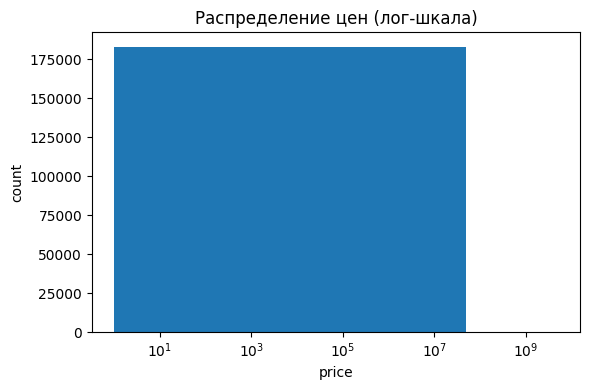

In [35]:
plot_df = sample_for_plots(train)

# –ì–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞ —Ü–µ–Ω (–ª–æ–≥-—à–∫–∞–ª–∞)
if "price" in plot_df.columns:
    price_vals = plot_df.select(pl.col("price").cast(pl.Float64)).to_series().to_numpy()
    price_vals = price_vals[np.isfinite(price_vals) & (price_vals > 0)]
    if len(price_vals) > 0:
        plt.figure(figsize=(6, 4))
        plt.hist(price_vals, bins=100)
        plt.xscale("log")
        plt.title("–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ü–µ–Ω (–ª–æ–≥-—à–∫–∞–ª–∞)")
        plt.xlabel("price")
        plt.ylabel("count")
        plt.tight_layout()
        plt.show()

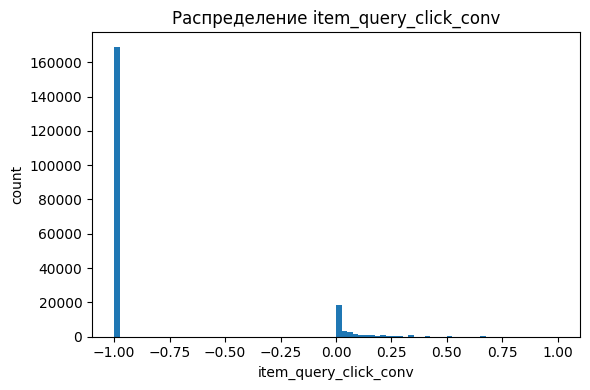

In [36]:
# –ì–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞ item_query_click_conv
if "item_query_click_conv" in plot_df.columns:
    conv_vals = plot_df.select(pl.col("item_query_click_conv").cast(pl.Float64)).to_series().to_numpy()
    conv_vals = conv_vals[np.isfinite(conv_vals)]
    if len(conv_vals) > 0:
        plt.figure(figsize=(6, 4))
        plt.hist(conv_vals, bins=80)
        plt.title("–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ item_query_click_conv")
        plt.xlabel("item_query_click_conv")
        plt.ylabel("count")
        plt.tight_layout()
        plt.show()


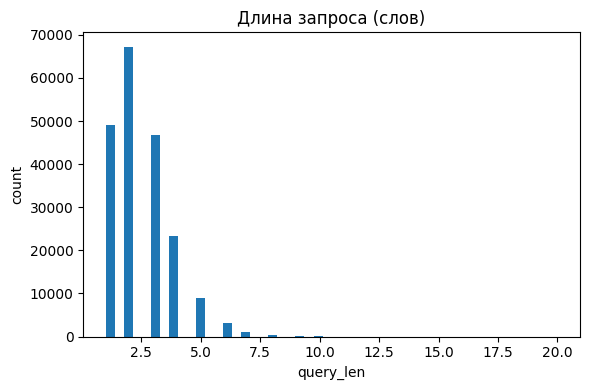

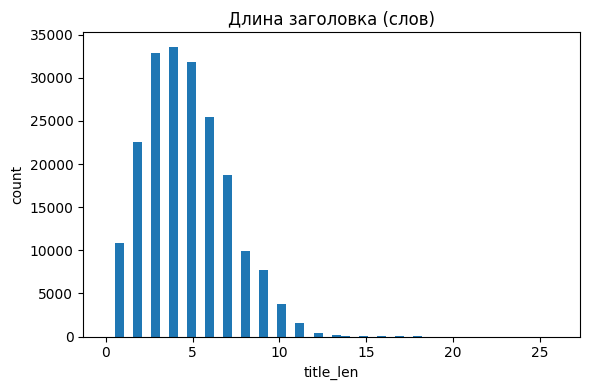

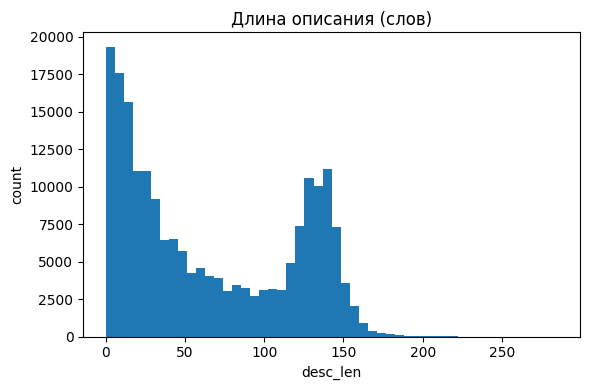

In [37]:
# –î–ª–∏–Ω—ã —Ç–µ–∫—Å—Ç–æ–≤
if has_text:
    q_len = plot_df.select(pl.col("query_len").cast(pl.Float64)).to_series().to_numpy()
    t_len = plot_df.select(pl.col("title_len").cast(pl.Float64)).to_series().to_numpy()
    d_len = plot_df.select(pl.col("desc_len").cast(pl.Float64)).to_series().to_numpy()

    plt.figure(figsize=(6, 4))
    plt.hist(q_len[np.isfinite(q_len)], bins=50)
    plt.title("–î–ª–∏–Ω–∞ –∑–∞–ø—Ä–æ—Å–∞ (—Å–ª–æ–≤)")
    plt.xlabel("query_len")
    plt.ylabel("count")
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(6, 4))
    plt.hist(t_len[np.isfinite(t_len)], bins=50)
    plt.title("–î–ª–∏–Ω–∞ –∑–∞–≥–æ–ª–æ–≤–∫–∞ (—Å–ª–æ–≤)")
    plt.xlabel("title_len")
    plt.ylabel("count")
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(6, 4))
    plt.hist(d_len[np.isfinite(d_len)], bins=50)
    plt.title("–î–ª–∏–Ω–∞ –æ–ø–∏—Å–∞–Ω–∏—è (—Å–ª–æ–≤)")
    plt.xlabel("desc_len")
    plt.ylabel("count")
    plt.tight_layout()
    plt.show()

In [38]:
test.head(5)

shape: (5, 13)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ query_id ‚îÜ item_id    ‚îÜ query_text ‚îÜ item_title ‚îÜ ‚Ä¶ ‚îÜ item_mcat_ ‚îÜ item_loc ‚îÜ price  ‚îÜ item_quer ‚îÇ
‚îÇ ---      ‚îÜ ---        ‚îÜ ---        ‚îÜ ---        ‚îÜ   ‚îÜ id         ‚îÜ ---      ‚îÜ ---    ‚îÜ y_click_c ‚îÇ
‚îÇ i64      ‚îÜ i64        ‚îÜ str        ‚îÜ str        ‚îÜ   ‚îÜ ---        ‚îÜ i32      ‚îÜ f32    ‚îÜ onv       ‚îÇ
‚îÇ          ‚îÜ            ‚îÜ            ‚îÜ            ‚îÜ   ‚îÜ i32        ‚îÜ          ‚îÜ        ‚îÜ ---       ‚îÇ
‚îÇ          ‚îÜ            ‚îÜ            ‚îÜ            ‚îÜ   ‚îÜ            ‚îÜ          ‚îÜ        ‚îÜ f32       ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 55       ‚îÜ 7540855789 ‚îÜ 1 —Å–µ–Ω—Ç—è–±—Ä—è ‚îÜ –í–æ–∑–¥—É—à–Ω—ã–µ  ‚îÜ ‚Ä¶ ‚îÜ 2301564    ‚îÜ 637640   ‚îÜ 120.0  ‚îÜ -1.0      ‚îÇ
‚îÇ          ‚îÜ            ‚îÜ            ‚îÜ –∏ –≥–µ–ª–∏–µ–≤—ã–µ ‚îÜ   ‚îÜ            ‚îÜ          ‚îÜ        ‚îÜ           ‚îÇ
‚îÇ          ‚îÜ            ‚îÜ            ‚îÜ —à–∞—Ä—ã –Ω–∞ 1‚Ä¶ ‚îÜ   ‚îÜ            ‚îÜ          ‚îÜ        ‚îÜ           ‚îÇ
‚îÇ 55       ‚îÜ 7506720336 ‚îÜ 1 —Å–µ–Ω—Ç—è–±—Ä—è ‚îÜ 1 —Å–µ–Ω—Ç—è–±—Ä—è ‚îÜ ‚Ä¶ ‚îÜ 2301564    ‚îÜ 637640   ‚îÜ 5000.0 ‚îÜ -1.0      ‚îÇ
‚îÇ          ‚îÜ            ‚îÜ            ‚îÜ —Ñ–æ—Ç–æ–∑–æ–Ω–∞   ‚îÜ   ‚îÜ            ‚îÜ          ‚îÜ        ‚îÜ           ‚îÇ
‚îÇ 55       ‚îÜ 3110733862 ‚îÜ 1 —Å–µ–Ω—Ç—è–±—Ä—è ‚îÜ –ë—É–∫–µ—Ç –Ω–∞ 1 ‚îÜ ‚Ä¶ ‚îÜ 1090077    ‚îÜ 637640   ‚îÜ 1200.0 ‚îÜ -1.0      ‚îÇ
‚îÇ          ‚îÜ            ‚îÜ            ‚îÜ —Å–µ–Ω—Ç—è–±—Ä—è   ‚îÜ   ‚îÜ            ‚îÜ          ‚îÜ        ‚îÜ           ‚îÇ
‚îÇ          ‚îÜ            ‚îÜ            ‚îÜ –∏–∑ –∑–µ—Ñ–∏—Ä–∞  ‚îÜ   ‚îÜ            ‚îÜ          ‚îÜ        ‚îÜ           ‚îÇ
‚îÇ 55       ‚îÜ 7587733901 ‚îÜ 1 —Å–µ–Ω—Ç—è–±—Ä—è ‚îÜ –°–ø–µ–∫—Ç–∞–∫–ª—å- ‚îÜ ‚Ä¶ ‚îÜ 2301563    ‚îÜ 637640   ‚îÜ 0.0    ‚îÜ -1.0      ‚îÇ
‚îÇ          ‚îÜ            ‚îÜ            ‚îÜ –ø–∞–Ω—Ç–æ–º–∏–º–∞  ‚îÜ   ‚îÜ            ‚îÜ          ‚îÜ        ‚îÜ           ‚îÇ
‚îÇ          ‚îÜ            ‚îÜ            ‚îÜ –Ω–∞ 1       ‚îÜ   ‚îÜ            ‚îÜ          ‚îÜ        ‚îÜ           ‚îÇ
‚îÇ          ‚îÜ            ‚îÜ            ‚îÜ —Å–µ–Ω—Ç—è‚Ä¶     ‚îÜ   ‚îÜ            ‚îÜ          ‚îÜ        ‚îÜ           ‚îÇ
‚îÇ 55       ‚îÜ 7552455685 ‚îÜ 1 —Å–µ–Ω—Ç—è–±—Ä—è ‚îÜ –í–æ–∑–¥—É—à–Ω—ã–µ  ‚îÜ ‚Ä¶ ‚îÜ 2301564    ‚îÜ 637640   ‚îÜ 100.0  ‚îÜ -1.0      ‚îÇ
‚îÇ          ‚îÜ            ‚îÜ            ‚îÜ –≥–µ–ª–∏–µ–≤—ã–µ   ‚îÜ   ‚îÜ            ‚îÜ          ‚îÜ        ‚îÜ           ‚îÇ
‚îÇ          ‚îÜ            ‚îÜ            ‚îÜ —à–∞—Ä—ã —Å     ‚îÜ   ‚îÜ            ‚îÜ          ‚îÜ        ‚îÜ           ‚îÇ
‚îÇ          ‚îÜ            ‚îÜ            ‚îÜ –¥–æ—Å—Ç‚Ä¶      ‚îÜ   ‚îÜ            ‚îÜ          ‚îÜ        ‚îÜ           ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [43]:
ex = train.filter(pl.col("query_id") == 757116)
ex

shape: (500, 22)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ query_id ‚îÜ item_id    ‚îÜ query_tex ‚îÜ item_titl ‚îÜ ‚Ä¶ ‚îÜ title_len ‚îÜ desc_len ‚îÜ overlap_q ‚îÜ overlap_q ‚îÇ
‚îÇ ---      ‚îÜ ---        ‚îÜ t         ‚îÜ e         ‚îÜ   ‚îÜ ---       ‚îÜ ---      ‚îÜ _title    ‚îÜ _desc     ‚îÇ
‚îÇ i64      ‚îÜ i64        ‚îÜ ---       ‚îÜ ---       ‚îÜ   ‚îÜ u32       ‚îÜ u32      ‚îÜ ---       ‚îÜ ---       ‚îÇ
‚îÇ          ‚îÜ            ‚îÜ str       ‚îÜ str       ‚îÜ   ‚îÜ           ‚îÜ          ‚îÜ u32       ‚îÜ u32       ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 757116   ‚îÜ 7272304632 ‚îÜ –ø–æ–≤–∞—Ä     ‚îÜ –ü–æ–≤–∞—Ä     ‚îÜ ‚Ä¶ ‚îÜ 1         ‚îÜ 0        ‚îÜ 1         ‚îÜ 0         ‚îÇ
‚îÇ 757116   ‚îÜ 1911918753 ‚îÜ –ø–æ–≤–∞—Ä     ‚îÜ –ü–æ–≤–∞—Ä     ‚îÜ ‚Ä¶ ‚îÜ 1         ‚îÜ 115      ‚îÜ 1         ‚îÜ 0         ‚îÇ
‚îÇ 757116   ‚îÜ 4408324839 ‚îÜ –ø–æ–≤–∞—Ä     ‚îÜ –ü–æ–≤–∞—Ä –≥/—Ü ‚îÜ ‚Ä¶ ‚îÜ 3         ‚îÜ 20       ‚îÜ 1         ‚îÜ 0         ‚îÇ
‚îÇ 757116   ‚îÜ 4600842279 ‚îÜ –ø–æ–≤–∞—Ä     ‚îÜ –ü–æ–≤–∞—Ä     ‚îÜ ‚Ä¶ ‚îÜ 1         ‚îÜ 0        ‚îÜ 1         ‚îÜ 0         ‚îÇ
‚îÇ 757116   ‚îÜ 3196572628 ‚îÜ –ø–æ–≤–∞—Ä     ‚îÜ –ü–æ–≤–∞—Ä –º–Ω–µ ‚îÜ ‚Ä¶ ‚îÜ 3         ‚îÜ 0        ‚îÜ 1         ‚îÜ 0         ‚îÇ
‚îÇ          ‚îÜ            ‚îÜ           ‚îÜ –∏–Ω—Ç–µ—Ä–µ—Å–Ω–æ ‚îÜ   ‚îÜ           ‚îÜ          ‚îÜ           ‚îÜ           ‚îÇ
‚îÇ ‚Ä¶        ‚îÜ ‚Ä¶          ‚îÜ ‚Ä¶         ‚îÜ ‚Ä¶         ‚îÜ ‚Ä¶ ‚îÜ ‚Ä¶         ‚îÜ ‚Ä¶        ‚îÜ ‚Ä¶         ‚îÜ ‚Ä¶         ‚îÇ
‚îÇ 757116   ‚îÜ 7253759823 ‚îÜ –ø–æ–≤–∞—Ä     ‚îÜ –ü–æ–≤–∞—Ä —Å   ‚îÜ ‚Ä¶ ‚îÜ 3         ‚îÜ 2        ‚îÜ 1         ‚îÜ 0         ‚îÇ
‚îÇ          ‚îÜ            ‚îÜ           ‚îÜ –æ–±—É—á–µ–Ω–∏–µ–º ‚îÜ   ‚îÜ           ‚îÜ          ‚îÜ           ‚îÜ           ‚îÇ
‚îÇ 757116   ‚îÜ 7309049240 ‚îÜ –ø–æ–≤–∞—Ä     ‚îÜ –ü–æ–≤–∞—Ä     ‚îÜ ‚Ä¶ ‚îÜ 1         ‚îÜ 0        ‚îÜ 1         ‚îÜ 0         ‚îÇ
‚îÇ 757116   ‚îÜ 7661062654 ‚îÜ –ø–æ–≤–∞—Ä     ‚îÜ –ü–æ–≤–∞—Ä     ‚îÜ ‚Ä¶ ‚îÜ 1         ‚îÜ 0        ‚îÜ 1         ‚îÜ 0         ‚îÇ
‚îÇ 757116   ‚îÜ 4489909943 ‚îÜ –ø–æ–≤–∞—Ä     ‚îÜ –ü–æ–≤–∞—Ä     ‚îÜ ‚Ä¶ ‚îÜ 1         ‚îÜ 3        ‚îÜ 1         ‚îÜ 1         ‚îÇ
‚îÇ 757116   ‚îÜ 7566079994 ‚îÜ –ø–æ–≤–∞—Ä     ‚îÜ –ü–æ–≤–∞—Ä     ‚îÜ ‚Ä¶ ‚îÜ 1         ‚îÜ 0        ‚îÜ 1         ‚îÜ 0         ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò